## This is for a Kaggle competition where we predict the survival of the Titanic passengers.

### To compare which model to use: RNN, KNN, Decision Tree, SVM, Logistic Regression, Random Forest or XGB.

Lets first load required libraries:

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import re
import seaborn as sns
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Lambda, Activation
from keras.optimizers import Adam, SGD, RMSprop

Lets download the dataset

### Load Data From CSV File  

In [3]:
df = pd.read_csv('C:/Users/taihs/OneDrive/Documents/titanic/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [240]:
df.shape

(891, 12)

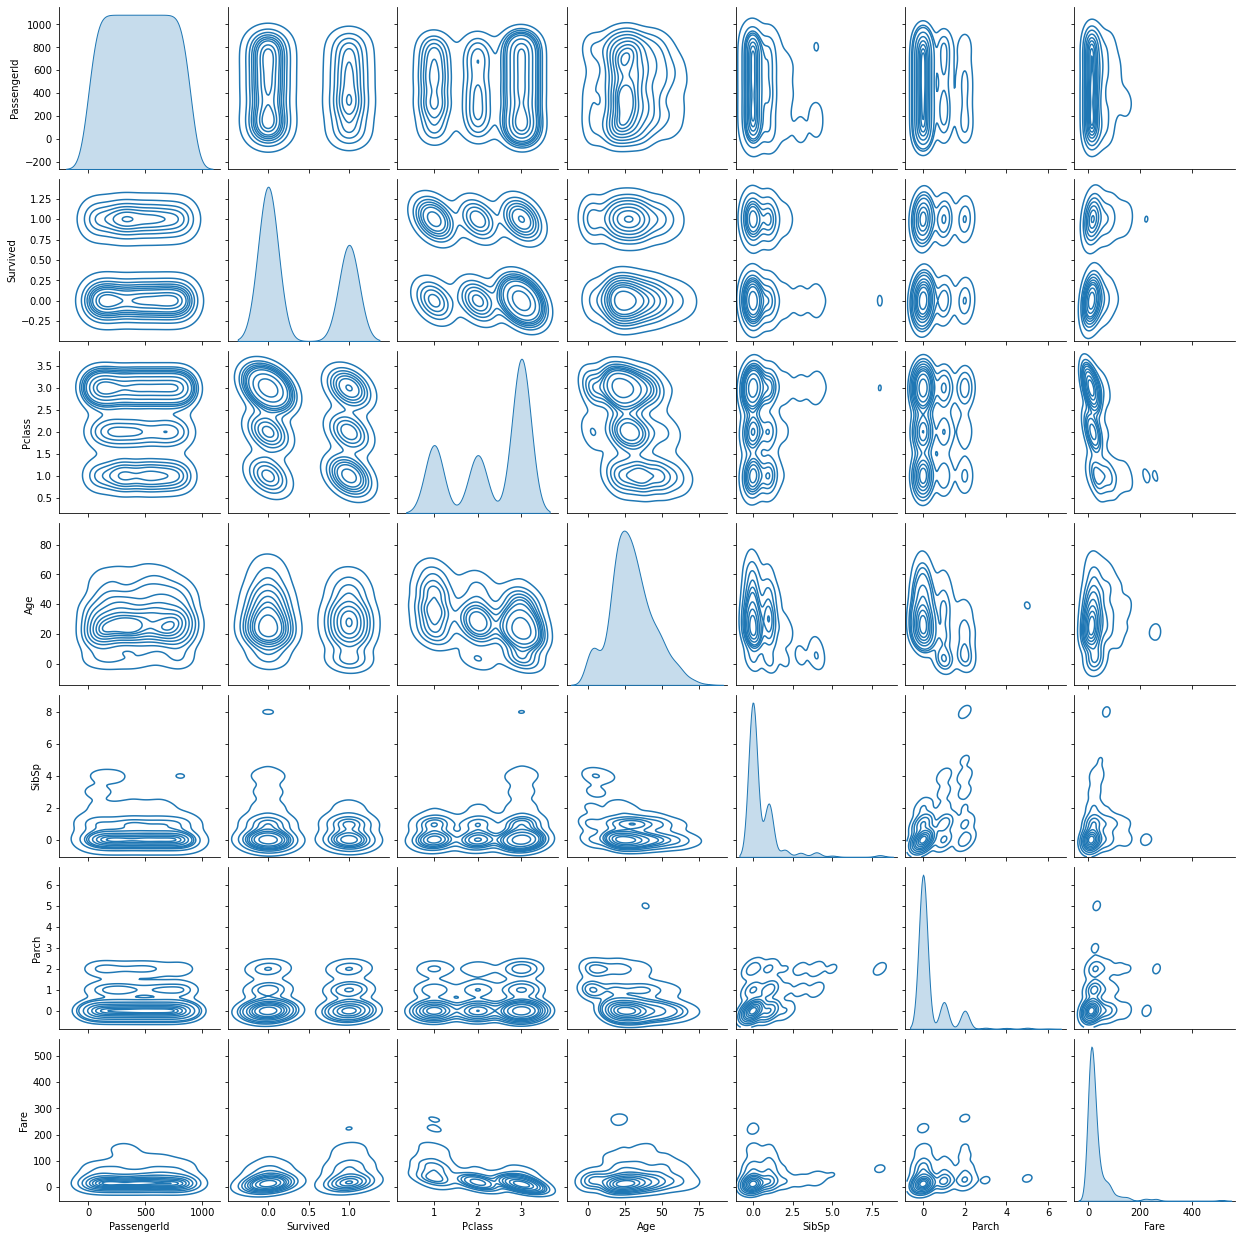

In [269]:
sns.pairplot(df,kind='kde')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

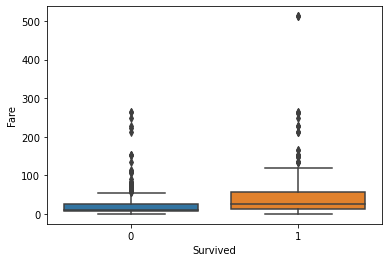

In [4]:
sns.boxplot(x=df['Survived'], y=df['Fare'])

In [5]:
pd.crosstab(df['Survived'],df['Fare'])

Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
Survived,,,,,,,,,,,,,,,,,,,,,
0,14,1,1,1,1,1,2,2,1,1,...,1,0,0,1,1,1,1,0,2,0
1,1,0,0,0,0,0,0,0,0,0,...,2,2,3,0,0,3,1,2,2,3


In [6]:
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

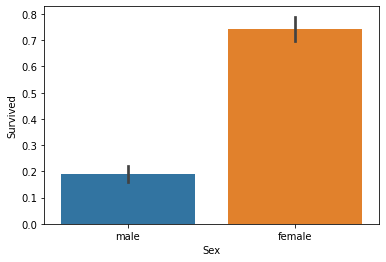

In [7]:
sns.barplot(x=df['Sex'], y=df['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='Age'>

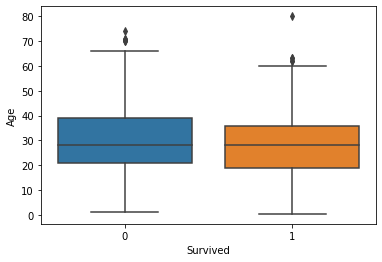

In [8]:
sns.boxplot(x=df['Survived'],y=df['Age'])

C:\Users\taihs\anaconda3\envs\new_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

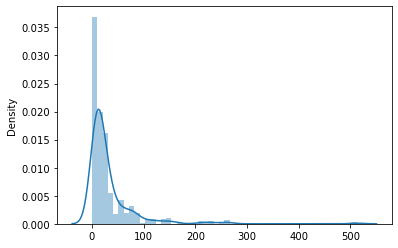

In [9]:
sns.distplot(x=df['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

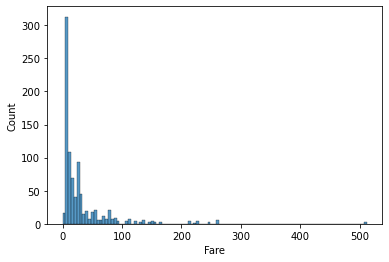

In [10]:
sns.histplot(x=df['Fare'])

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

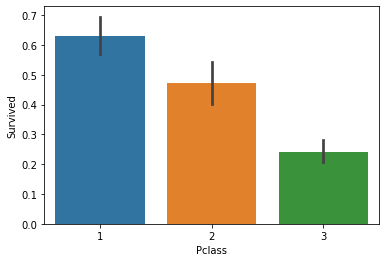

In [11]:
sns.barplot(x=df['Pclass'],y=df['Survived'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

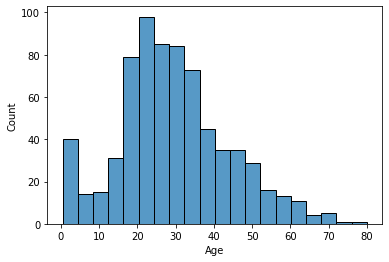

In [12]:
sns.histplot(x=df['Age'])

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

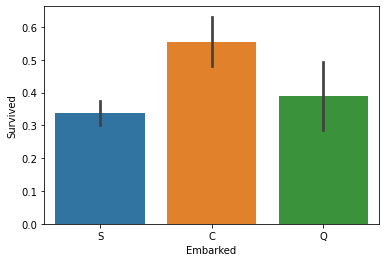

In [13]:
sns.barplot(x=df['Embarked'],y=df['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

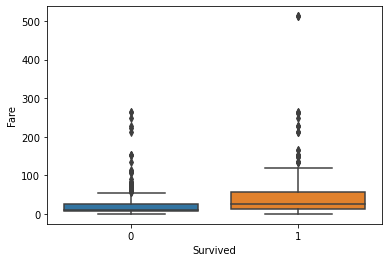

In [14]:
sns.boxplot(x=df['Survived'],y=df['Fare'])

In [15]:
namelst = df['Name'].tolist()

lst1=[]
for i in namelst:
    lst=re.findall("Mr.|Mrs|Miss|Master",i)
    if len(lst)>0:
        lst1.append(lst[0])
    else:
        lst1.append('None')

titledf=pd.DataFrame({'title':lst1})
titledf.value_counts()

title 
Mr.       517
Miss      182
Mrs       127
Master     40
None       24
Mr          1
dtype: int64

In [16]:
titledf.replace(to_replace=['Mr.','Mr '],value='Mr',inplace=True)
titledf.replace(to_replace=['Mr','Miss','Mrs','Master','None'],value=[0,1,2,3,4],inplace=True)
titledf.value_counts()

title
0        518
1        182
2        127
3         40
4         24
dtype: int64

<AxesSubplot:xlabel='title', ylabel='Survived'>

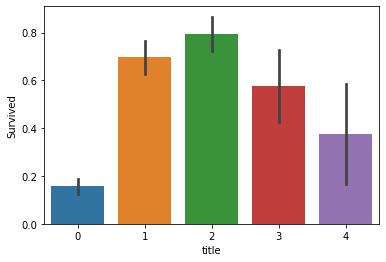

In [17]:
sns.barplot(x=titledf['title'],y=df['Survived'])

In [18]:
pd.crosstab(titledf['title'],df['Survived'])

Survived,0,1
title,,
0,436,82
1,55,127
2,26,101
3,17,23
4,15,9


### Test which feature is important

In [19]:
pd.crosstab(df['Embarked'],df['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [20]:
from scipy.stats import chi2_contingency

lst = df.select_dtypes(include='object')

chi=[]
for i in lst:
    if chi2_contingency(pd.crosstab(df['Survived'], df[i]))[1] < 0.05:
        chi.append(i)
chi

['Sex', 'Ticket', 'Embarked']

In [21]:
gp=df.groupby(['Embarked','Survived'])
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna('S')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
df.loc[df['Age']<10, 'AgeCat']=0
df.loc[(df['Age']>=10) & (df['Age'] <20), 'AgeCat']=1
df.loc[(df['Age']>=20) & (df['Age']<30), 'AgeCat']=2
df.loc[(df['Age']>=30) & (df['Age']<40), 'AgeCat']=3
df.loc[(df['Age']>=40) & (df['Age']<50), 'AgeCat']=4
df.loc[(df['Age']>=50) & (df['Age']<60), 'AgeCat']=5
df.loc[(df['Age']>=60) & (df['Age']<70), 'AgeCat']=6
df.loc[(df['Age']>=70) & (df['Age']<80), 'AgeCat']=7
df.loc[df['Age']>=80, 'AgeCat']=8
df['AgeCat']=df['AgeCat'].astype('int64')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,2


In [24]:
df.loc[df['Fare']<10, 'FareCat']=0
df.loc[(df['Fare']>=10) & (df['Fare'] <20), 'FareCat']=1
df.loc[(df['Fare']>=20) & (df['Fare']<30), 'FareCat']=2
df.loc[(df['Fare']>=30) & (df['Fare']<40), 'FareCat']=3
df.loc[(df['Fare']>=40) & (df['Fare']<50), 'FareCat']=4
df.loc[(df['Fare']>=50) & (df['Fare']<60), 'FareCat']=5
df.loc[(df['Fare']>=60) & (df['Fare']<70), 'FareCat']=6
df.loc[(df['Fare']>=70) & (df['Fare']<80), 'FareCat']=7
df.loc[(df['Fare']>=80) & (df['Fare']<90), 'FareCat']=8
df.loc[(df['Fare']>=90) & (df['Fare']<100), 'FareCat']=9
df.loc[(df['Fare']>=100) & (df['Fare']<120), 'FareCat']=10
df.loc[(df['Fare']>=120) & (df['Fare']<140), 'FareCat']=11
df.loc[(df['Fare']>=140) & (df['Fare']<160), 'FareCat']=12
df.loc[(df['Fare']>=160) & (df['Fare']<180), 'FareCat']=13
df.loc[(df['Fare']>=180) & (df['Fare']<200), 'FareCat']=14
df.loc[(df['Fare']>=200) & (df['Fare']<220), 'FareCat']=15
df.loc[(df['Fare']>=220) & (df['Fare']<240), 'FareCat']=16
df.loc[(df['Fare']>=240) & (df['Fare']<260), 'FareCat']=17
df.loc[(df['Fare']>=260) & (df['Fare']<280), 'FareCat']=18
df.loc[(df['Fare']>=280) & (df['Fare']<300), 'FareCat']=19
df.loc[(df['Fare']>=300) & (df['Fare']<350), 'FareCat']=20
df.loc[(df['Fare']>=350) & (df['Fare']<400), 'FareCat']=21
df.loc[(df['Fare']>=400) & (df['Fare']<450), 'FareCat']=22
df.loc[(df['Fare']>=450) & (df['Fare']<500), 'FareCat']=23
df.loc[df['Fare']>=500, 'FareCat']=24
df['FareCat']=df['FareCat'].astype('int64')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,3,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,3,5
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,2,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,2,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,2,3


C:\Users\taihs\anaconda3\envs\new_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AgeCat', ylabel='Density'>

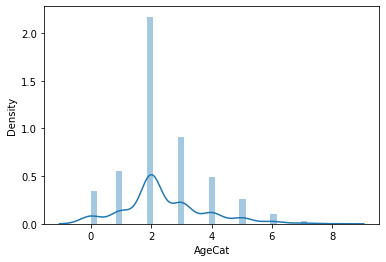

In [25]:
sns.distplot(df['AgeCat'])

# Data visualization and pre-processing



## Convert Categorical features to numerical values

Lets look at gender:

In [26]:
df.groupby(['Embarked'])['Survived'].value_counts(normalize=True)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: Survived, dtype: float64

In [27]:
df.groupby(['Cabin'])['Survived'].value_counts(normalize=True)
df['Cabin'].value_counts()
df['Cabin']=df['Cabin'].fillna(0)

In [28]:
df.loc[df['Cabin']!=0, 'Cabin']= 1
df['Cabin'].value_counts()
df.groupby(['Cabin'])['Survived'].value_counts(normalize=True)

Cabin  Survived
0      0           0.700146
       1           0.299854
1      1           0.666667
       0           0.333333
Name: Survived, dtype: float64

In [29]:
df.groupby(['Fare'])['Survived'].value_counts(normalize=True)
df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

Lets convert male to 0 and female to 1:


In [30]:
df['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
#pd.get_dummies(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,C,3,7
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,S,3,5
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S,3,0


In [31]:
df['Embarked'].replace(to_replace=['S','C','Q'], value=[0,1,2],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int64  
 12  AgeCat       891 non-null    int64  
 13  FareCat      891 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 97.6+ KB


In [32]:
df['Fare']=df['Fare'].astype(int)
df['Age']=df['Age'].astype(int)
df['Cabin']=df['Cabin'].astype(int)
#df_sex=pd.get_dummies(df['Sex'])
#df_embarked=pd.get_dummies(df['Embarked'])
#df_title = pd.get_dummies(titledf['title'])
#Feature=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
#Feature=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
#Feature=pd.concat([df[['Pclass','Sex','AgeCat','SibSp','Cabin','Embarked']],titledf],axis=1) # best
Feature=pd.concat([df[['Pclass','Sex','AgeCat','SibSp','Cabin','Embarked']],titledf],axis=1)
Feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int64
 2   AgeCat    891 non-null    int64
 3   SibSp     891 non-null    int64
 4   Cabin     891 non-null    int32
 5   Embarked  891 non-null    int64
 6   title     891 non-null    int64
dtypes: int32(1), int64(6)
memory usage: 45.4 KB


In [33]:
df['Cabin'].value_counts()

0    687
1    204
Name: Cabin, dtype: int64

### Feature selection

Lets defind feature sets, X:

In [34]:
X = Feature
X[0:5]
X.shape

(891, 7)

What are our lables?

In [35]:
y = df['Survived']
y[0:5]
y.shape

(891,)

## Split to train and test files

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=8)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 7) (712,)
Test set: (179, 7) (179,)


## Normalize Data
Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [37]:
Scal = preprocessing.StandardScaler()
X_train= Scal.fit(X_train).transform(X_train)
X_test= Scal.transform(X_test)


# RNN

In [38]:
model_1 = Sequential()
model_1.add(Dense(12,input_shape = (7,),activation = 'relu'))
model_1.add(Dense(12,activation='relu'))
model_1.add(Dense(1,activation='relu'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

Epoch 1/500
23/23 [==============================] - 0s 15ms/step - loss: 3.8366 - accuracy: 0.6053 - val_loss: 3.0383 - val_accuracy: 0.6257
Epoch 2/500
23/23 [==============================] - 0s 3ms/step - loss: 3.2106 - accuracy: 0.6053 - val_loss: 2.3682 - val_accuracy: 0.6369
Epoch 3/500
23/23 [==============================] - 0s 3ms/step - loss: 2.4794 - accuracy: 0.6208 - val_loss: 1.7091 - val_accuracy: 0.7430
Epoch 4/500
23/23 [==============================] - 0s 2ms/step - loss: 2.6533 - accuracy: 0.6236 - val_loss: 2.1580 - val_accuracy: 0.6983
Epoch 5/500
23/23 [==============================] - 0s 3ms/step - loss: 1.5153 - accuracy: 0.7079 - val_loss: 1.9152 - val_accuracy: 0.7151
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 1.4118 - accuracy: 0.7233 - val_loss: 1.6850 - val_accuracy: 0.7318
Epoch 7/500
23/23 [==============================] - 0s 2ms/step - loss: 1.1425 - accuracy: 0.7598 - val_loss: 1.1313 - val_accuracy: 0.6927
Epoch 8/500


Epoch 59/500
23/23 [==============================] - 0s 6ms/step - loss: 0.4269 - accuracy: 0.8188 - val_loss: 0.5685 - val_accuracy: 0.7430
Epoch 60/500
23/23 [==============================] - 0s 5ms/step - loss: 0.4254 - accuracy: 0.8216 - val_loss: 0.5719 - val_accuracy: 0.7318
Epoch 61/500
23/23 [==============================] - 0s 6ms/step - loss: 0.4255 - accuracy: 0.8174 - val_loss: 0.5212 - val_accuracy: 0.7374
Epoch 62/500
23/23 [==============================] - 0s 5ms/step - loss: 0.4239 - accuracy: 0.8230 - val_loss: 0.5248 - val_accuracy: 0.7374
Epoch 63/500
23/23 [==============================] - 0s 6ms/step - loss: 0.4248 - accuracy: 0.8244 - val_loss: 0.5680 - val_accuracy: 0.7430
Epoch 64/500
23/23 [==============================] - 0s 6ms/step - loss: 0.4228 - accuracy: 0.8287 - val_loss: 0.5703 - val_accuracy: 0.7486
Epoch 65/500
23/23 [==============================] - 0s 5ms/step - loss: 0.4224 - accuracy: 0.8272 - val_loss: 0.5181 - val_accuracy: 0.7374
Epoch 

23/23 [==============================] - 0s 6ms/step - loss: 0.3985 - accuracy: 0.8357 - val_loss: 0.5393 - val_accuracy: 0.7933
Epoch 117/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3994 - accuracy: 0.8357 - val_loss: 0.4821 - val_accuracy: 0.7933
Epoch 118/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3991 - accuracy: 0.8357 - val_loss: 0.4827 - val_accuracy: 0.7933
Epoch 119/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3977 - accuracy: 0.8357 - val_loss: 0.4810 - val_accuracy: 0.7933
Epoch 120/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3968 - accuracy: 0.8357 - val_loss: 0.4881 - val_accuracy: 0.7989
Epoch 121/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3980 - accuracy: 0.8357 - val_loss: 0.4834 - val_accuracy: 0.7933
Epoch 122/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3967 - accuracy: 0.8357 - val_loss: 0.4931 - val_accuracy: 0.7933
Epoch 123/500

23/23 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8441 - val_loss: 0.4740 - val_accuracy: 0.8101
Epoch 174/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.8441 - val_loss: 0.4710 - val_accuracy: 0.8156
Epoch 175/500
23/23 [==============================] - 0s 5ms/step - loss: 0.3837 - accuracy: 0.8483 - val_loss: 0.4746 - val_accuracy: 0.8101
Epoch 176/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3842 - accuracy: 0.8469 - val_loss: 0.4712 - val_accuracy: 0.8101
Epoch 177/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3846 - accuracy: 0.8483 - val_loss: 0.4690 - val_accuracy: 0.8101
Epoch 178/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3830 - accuracy: 0.8455 - val_loss: 0.4776 - val_accuracy: 0.8101
Epoch 179/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3841 - accuracy: 0.8469 - val_loss: 0.4774 - val_accuracy: 0.8101
Epoch 180/500

23/23 [==============================] - 0s 6ms/step - loss: 0.3758 - accuracy: 0.8427 - val_loss: 0.5137 - val_accuracy: 0.8045
Epoch 231/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3773 - accuracy: 0.8455 - val_loss: 0.5219 - val_accuracy: 0.8101
Epoch 232/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3772 - accuracy: 0.8455 - val_loss: 0.5189 - val_accuracy: 0.8101
Epoch 233/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3752 - accuracy: 0.8455 - val_loss: 0.5274 - val_accuracy: 0.8101
Epoch 234/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3768 - accuracy: 0.8441 - val_loss: 0.5184 - val_accuracy: 0.8101
Epoch 235/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3760 - accuracy: 0.8469 - val_loss: 0.5218 - val_accuracy: 0.8045
Epoch 236/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3762 - accuracy: 0.8469 - val_loss: 0.5250 - val_accuracy: 0.8045
Epoch 237/500

23/23 [==============================] - 0s 4ms/step - loss: 0.3709 - accuracy: 0.8441 - val_loss: 0.5163 - val_accuracy: 0.8101
Epoch 288/500
23/23 [==============================] - 0s 4ms/step - loss: 0.3713 - accuracy: 0.8455 - val_loss: 0.5238 - val_accuracy: 0.8212
Epoch 289/500
23/23 [==============================] - 0s 4ms/step - loss: 0.3724 - accuracy: 0.8455 - val_loss: 0.5218 - val_accuracy: 0.8045
Epoch 290/500
23/23 [==============================] - 0s 4ms/step - loss: 0.3715 - accuracy: 0.8455 - val_loss: 0.5186 - val_accuracy: 0.8045
Epoch 291/500
23/23 [==============================] - 0s 3ms/step - loss: 0.3715 - accuracy: 0.8469 - val_loss: 0.5201 - val_accuracy: 0.8045
Epoch 292/500
23/23 [==============================] - 0s 3ms/step - loss: 0.3703 - accuracy: 0.8469 - val_loss: 0.5216 - val_accuracy: 0.8268
Epoch 293/500
23/23 [==============================] - 0s 4ms/step - loss: 0.3718 - accuracy: 0.8441 - val_loss: 0.5207 - val_accuracy: 0.8045
Epoch 294/500

23/23 [==============================] - 0s 6ms/step - loss: 0.3665 - accuracy: 0.8441 - val_loss: 0.5194 - val_accuracy: 0.8268
Epoch 345/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3662 - accuracy: 0.8441 - val_loss: 0.5209 - val_accuracy: 0.8268
Epoch 346/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3662 - accuracy: 0.8469 - val_loss: 0.5238 - val_accuracy: 0.8268
Epoch 347/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3665 - accuracy: 0.8455 - val_loss: 0.5217 - val_accuracy: 0.8268
Epoch 348/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3660 - accuracy: 0.8469 - val_loss: 0.5225 - val_accuracy: 0.8268
Epoch 349/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3684 - accuracy: 0.8427 - val_loss: 0.5777 - val_accuracy: 0.8268
Epoch 350/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3669 - accuracy: 0.8441 - val_loss: 0.5358 - val_accuracy: 0.8101
Epoch 351/500

23/23 [==============================] - 0s 6ms/step - loss: 0.3640 - accuracy: 0.8441 - val_loss: 0.5771 - val_accuracy: 0.8268
Epoch 402/500
23/23 [==============================] - 0s 3ms/step - loss: 0.3635 - accuracy: 0.8455 - val_loss: 0.5259 - val_accuracy: 0.8380
Epoch 403/500
23/23 [==============================] - 0s 3ms/step - loss: 0.3626 - accuracy: 0.8469 - val_loss: 0.5248 - val_accuracy: 0.8380
Epoch 404/500
23/23 [==============================] - 0s 5ms/step - loss: 0.3635 - accuracy: 0.8483 - val_loss: 0.5815 - val_accuracy: 0.8380
Epoch 405/500
23/23 [==============================] - 0s 5ms/step - loss: 0.3628 - accuracy: 0.8497 - val_loss: 0.5759 - val_accuracy: 0.8436
Epoch 406/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3627 - accuracy: 0.8455 - val_loss: 0.5775 - val_accuracy: 0.8380
Epoch 407/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3621 - accuracy: 0.8441 - val_loss: 0.5313 - val_accuracy: 0.8380
Epoch 408/500

23/23 [==============================] - 0s 6ms/step - loss: 0.3583 - accuracy: 0.8511 - val_loss: 0.5781 - val_accuracy: 0.8436
Epoch 459/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3596 - accuracy: 0.8469 - val_loss: 0.5456 - val_accuracy: 0.8436
Epoch 460/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3581 - accuracy: 0.8525 - val_loss: 0.5377 - val_accuracy: 0.8436
Epoch 461/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3577 - accuracy: 0.8497 - val_loss: 0.5784 - val_accuracy: 0.8436
Epoch 462/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3579 - accuracy: 0.8525 - val_loss: 0.5775 - val_accuracy: 0.8436
Epoch 463/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3575 - accuracy: 0.8483 - val_loss: 0.5391 - val_accuracy: 0.8436
Epoch 464/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3609 - accuracy: 0.8511 - val_loss: 0.5822 - val_accuracy: 0.8436
Epoch 465/500

In [40]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

y_pred_class_nn_1 = model_1.predict_classes(X_test)
y_pred_prob_nn_1 = model_1.predict(X_test)

print ('F1-score: ' ,f1_score(y_test, y_pred_class_nn_1, average='weighted'))


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
F1-score:  0.8344240435459553


# K Nearest Neighbor(KNN)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [42]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.74301676, 0.79329609, 0.7877095 , 0.77094972, 0.79329609,
       0.7877095 , 0.81564246, 0.84916201, 0.83240223])

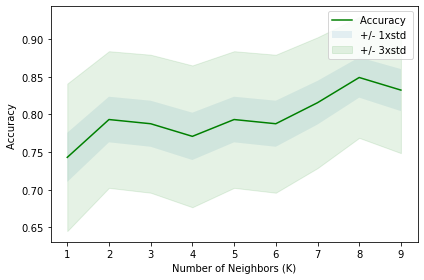

In [43]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# XGBoost

In [44]:
xgb = XGBClassifier(n_estimators=200)
xgb.fit(X_train, y_train)

C:\Users\taihs\anaconda3\envs\new_env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:52:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Random Forest

In [45]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [46]:
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)

#print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
#print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
Tree # it shows the default parameters
Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [49]:
predTree = Tree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[0 1 0 0 1]
350    0
176    0
723    0
404    0
306    1
Name: Survived, dtype: int64


# Support Vector Machine

In [50]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [51]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 1, 1], dtype=int64)

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [53]:
yhat = LR.predict(X_test)
yhat [0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [55]:
neigh = KNeighborsClassifier(n_neighbors = 8).fit(X_train,y_train)
yhat1 = neigh.predict(X_test)
yhat2 = Tree.predict(X_test)
yhat3 = clf.predict(X_test)
yhat4 = LR.predict(X_test)
yhat5 = rf_model.predict(X_test)
yhat6 = xgb.predict(X_test)

In [56]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

print ('KNN F1-score: ' ,f1_score(y_test, yhat1, average='weighted'))
print ('Decision Tree F1-score: ',f1_score(y_test, yhat2, average='weighted'))
print ('SVM F1-score: ',f1_score(y_test, yhat3, average='weighted') )
print ('Logistic Reg F1-score: ',f1_score(y_test, yhat4, average='weighted') )
print ('Random Forest F1-score: ',f1_score(y_test, yhat5, average='weighted') )
print ('XGB F1-score: ',f1_score(y_test, yhat6, average='weighted') )


print ('KNN accuracy: ' ,accuracy_score(y_test, yhat1))
print ('Decision Tree accuracy: ',accuracy_score(y_test, yhat2))
print ('SVM accuracy: ',accuracy_score(y_test, yhat3) )
print ('Logistic Reg accuracy: ',accuracy_score(y_test, yhat4) )
print ('Random Forest accuracy: ',accuracy_score(y_test, yhat5) )
print ('XGB accuracy: ',accuracy_score(y_test, yhat6) )

KNN F1-score:  0.8464837834400385
Decision Tree F1-score:  0.8123690686489359
SVM F1-score:  0.8357474692317385
Logistic Reg F1-score:  0.7552382423821494
Random Forest F1-score:  0.7877094972067039
XGB F1-score:  0.8261329407431427
KNN accuracy:  0.8491620111731844
Decision Tree accuracy:  0.8156424581005587
SVM accuracy:  0.8379888268156425
Logistic Reg accuracy:  0.7541899441340782
Random Forest accuracy:  0.7877094972067039
XGB accuracy:  0.8268156424581006


# Model Evaluation using Test set

First, download and load the test set:

### Load Test set for evaluation 

In [57]:
test_df = pd.read_csv('C:/Users/taihs/OneDrive/Documents/titanic/test.csv')
test_df.info()
test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean())
#test_df['Embarked']=test_df['Embarked'].fillna(0)
test_df['Fare']=test_df['Fare'].fillna(0)
test_df['Cabin']=test_df['Cabin'].fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [58]:
test_df['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,S


In [59]:
test_df['Embarked'].replace(to_replace=['S','C','Q'], value=[0,1,2],inplace=True)

In [60]:
test_df.loc[test_df['Cabin']!=0, 'Cabin'] = 1

In [61]:
test_df['Cabin']=test_df['Cabin'].astype(int)

In [62]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,0


In [63]:
test_df['Age']=test_df['Age'].astype(int)
test_df['Fare']=test_df['Fare'].astype(int)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    object
 3   Sex          418 non-null    int64 
 4   Age          418 non-null    int32 
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Ticket       418 non-null    object
 8   Fare         418 non-null    int32 
 9   Cabin        418 non-null    int32 
 10  Embarked     418 non-null    int64 
dtypes: int32(3), int64(6), object(2)
memory usage: 31.1+ KB


In [64]:
namelst = test_df['Name'].tolist()

lst1=[]
for i in namelst:
    lst=re.findall("Mr.|Mrs|Miss|Master",i)
    if len(lst)>0:
        lst1.append(lst[0])
    else:
        lst1.append('None')

titledf=pd.DataFrame({'title':lst1})
titledf.value_counts()

title 
Mr.       240
Miss       78
Mrs        72
Master     21
None        7
dtype: int64

In [65]:
titledf.replace(to_replace=['Mr.','Mr '],value='Mr',inplace=True)
titledf.replace(to_replace=['Mr','Miss','Mrs','Master','None'],value=[0,1,2,3,4],inplace=True)
titledf.value_counts()

title
0        240
1         78
2         72
3         21
4          7
dtype: int64

In [66]:
test_df.loc[test_df['Age']<10, 'AgeCat']=0
test_df.loc[(test_df['Age']>=10) & (test_df['Age'] <20), 'AgeCat']=1
test_df.loc[(test_df['Age']>=20) & (test_df['Age']<30), 'AgeCat']=2
test_df.loc[(test_df['Age']>=30) & (test_df['Age']<40), 'AgeCat']=3
test_df.loc[(test_df['Age']>=40) & (test_df['Age']<50), 'AgeCat']=4
test_df.loc[(test_df['Age']>=50) & (test_df['Age']<60), 'AgeCat']=5
test_df.loc[(test_df['Age']>=60) & (test_df['Age']<70), 'AgeCat']=6
test_df.loc[(test_df['Age']>=70) & (test_df['Age']<80), 'AgeCat']=7
test_df.loc[test_df['Age']>=80, 'AgeCat']=8
test_df['AgeCat']=test_df['AgeCat'].astype('int64')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat
0,892,3,"Kelly, Mr. James",0,34,0,0,330911,7,0,2,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7,0,0,4
2,894,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9,0,2,6
3,895,3,"Wirz, Mr. Albert",0,27,0,0,315154,8,0,0,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30,0,0,A.5. 3236,8,0,0,3
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39,0,0,PC 17758,108,1,1,3
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38,0,0,SOTON/O.Q. 3101262,7,0,0,3
416,1308,3,"Ware, Mr. Frederick",0,30,0,0,359309,8,0,0,3


In [67]:
test_df.loc[test_df['Fare']<10, 'FareCat']=0
test_df.loc[(test_df['Fare']>=10) & (test_df['Fare'] <20), 'FareCat']=1
test_df.loc[(test_df['Fare']>=20) & (test_df['Fare']<30), 'FareCat']=2
test_df.loc[(test_df['Fare']>=30) & (test_df['Fare']<40), 'FareCat']=3
test_df.loc[(test_df['Fare']>=40) & (test_df['Fare']<50), 'FareCat']=4
test_df.loc[(test_df['Fare']>=50) & (test_df['Fare']<60), 'FareCat']=5
test_df.loc[(test_df['Fare']>=60) & (test_df['Fare']<70), 'FareCat']=6
test_df.loc[(test_df['Fare']>=70) & (test_df['Fare']<80), 'FareCat']=7
test_df.loc[(test_df['Fare']>=80) & (test_df['Fare']<90), 'FareCat']=8
test_df.loc[(test_df['Fare']>=90) & (test_df['Fare']<100), 'FareCat']=9
test_df.loc[(test_df['Fare']>=100) & (test_df['Fare']<120), 'FareCat']=10
test_df.loc[(test_df['Fare']>=120) & (test_df['Fare']<140), 'FareCat']=11
test_df.loc[(test_df['Fare']>=140) & (test_df['Fare']<160), 'FareCat']=12
test_df.loc[(test_df['Fare']>=160) & (test_df['Fare']<180), 'FareCat']=13
test_df.loc[(test_df['Fare']>=180) & (test_df['Fare']<200), 'FareCat']=14
test_df.loc[(test_df['Fare']>=200) & (test_df['Fare']<220), 'FareCat']=15
test_df.loc[(test_df['Fare']>=220) & (test_df['Fare']<240), 'FareCat']=16
test_df.loc[(test_df['Fare']>=240) & (test_df['Fare']<260), 'FareCat']=17
test_df.loc[(test_df['Fare']>=260) & (test_df['Fare']<280), 'FareCat']=18
test_df.loc[(test_df['Fare']>=280) & (test_df['Fare']<300), 'FareCat']=19
test_df.loc[(test_df['Fare']>=300) & (test_df['Fare']<350), 'FareCat']=20
test_df.loc[(test_df['Fare']>=350) & (test_df['Fare']<400), 'FareCat']=21
test_df.loc[(test_df['Fare']>=400) & (test_df['Fare']<450), 'FareCat']=22
test_df.loc[(test_df['Fare']>=450) & (test_df['Fare']<500), 'FareCat']=23
test_df.loc[test_df['Fare']>=500, 'FareCat']=24
test_df['FareCat']=test_df['FareCat'].astype('int64')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat,FareCat
0,892,3,"Kelly, Mr. James",0,34,0,0,330911,7,0,2,3,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7,0,0,4,0
2,894,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9,0,2,6,0
3,895,3,"Wirz, Mr. Albert",0,27,0,0,315154,8,0,0,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30,0,0,A.5. 3236,8,0,0,3,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39,0,0,PC 17758,108,1,1,3,10
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38,0,0,SOTON/O.Q. 3101262,7,0,0,3,0
416,1308,3,"Ware, Mr. Frederick",0,30,0,0,359309,8,0,0,3,0


In [68]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    object
 3   Sex          418 non-null    int64 
 4   Age          418 non-null    int32 
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Ticket       418 non-null    object
 8   Fare         418 non-null    int32 
 9   Cabin        418 non-null    int32 
 10  Embarked     418 non-null    int64 
 11  AgeCat       418 non-null    int64 
 12  FareCat      418 non-null    int64 
dtypes: int32(3), int64(8), object(2)
memory usage: 37.7+ KB


In [69]:
#X = test_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
#df_sex=pd.get_dummies(test_df['Sex'])
#df_embarked=pd.get_dummies(test_df['Embarked'])
#df_title=pd.get_dummies(titledf['title'])
#X = pd.concat([test_df[['Pclass','Age','SibSp','Parch','Fare','Cabin']],df_sex,df_embarked,df_title],axis=1)
#X=pd.concat([test_df[['Pclass','Sex','AgeCat','SibSp','Cabin','Embarked']],titledf],axis=1) # best
X=pd.concat([test_df[['Pclass','Sex','AgeCat','SibSp','Cabin','Embarked']],titledf],axis=1)
X.head()

,Pclass,Sex,AgeCat,SibSp,Cabin,Embarked,title
0,3,0,3,0,0,2,0
1,3,1,4,1,0,0,2
2,2,0,6,0,0,2,0
3,3,0,2,0,0,0,0
4,3,1,2,1,0,0,2


In [70]:
X= preprocessing.StandardScaler().fit(X).transform(X)
#X = Scal.transform(X)

In [71]:
#neigh = KNeighborsClassifier(n_neighbors = 3).fit(X,y)
yhat1 = neigh.predict(X)
yhat2 = Tree.predict(X) 
yhat3 = clf.predict(X)
yhat4 = LR.predict(X)
yhat5 = rf_model.predict(X) 
yhat6 = xgb.predict(X)
yhat7 = model_1.predict_classes(X) #best

In [72]:
rf_model.feature_importances_

array([0.12997573, 0.25496684, 0.17256386, 0.10128639, 0.06742682,
       0.05057755, 0.22320281])

In [73]:
df1=pd.DataFrame({'Survived':yhat7[:,0]})
df1.head()

,Survived
0,0
1,0
2,0
3,0
4,0


In [74]:
final = pd.concat([test_df['PassengerId'],df1],axis=1)
final.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [75]:
final.to_csv('gender_submission.csv',index=False)